In [5]:
import pandas as pd

In [6]:
data=pd.read_csv('2024.csv')

In [22]:
# Sütun isimlerinden 'Explained by: ' ifadesini kaldır
data.columns = data.columns.str.replace('Explained by: ', '', regex=False)

In [23]:
data.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Log GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [24]:
data.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


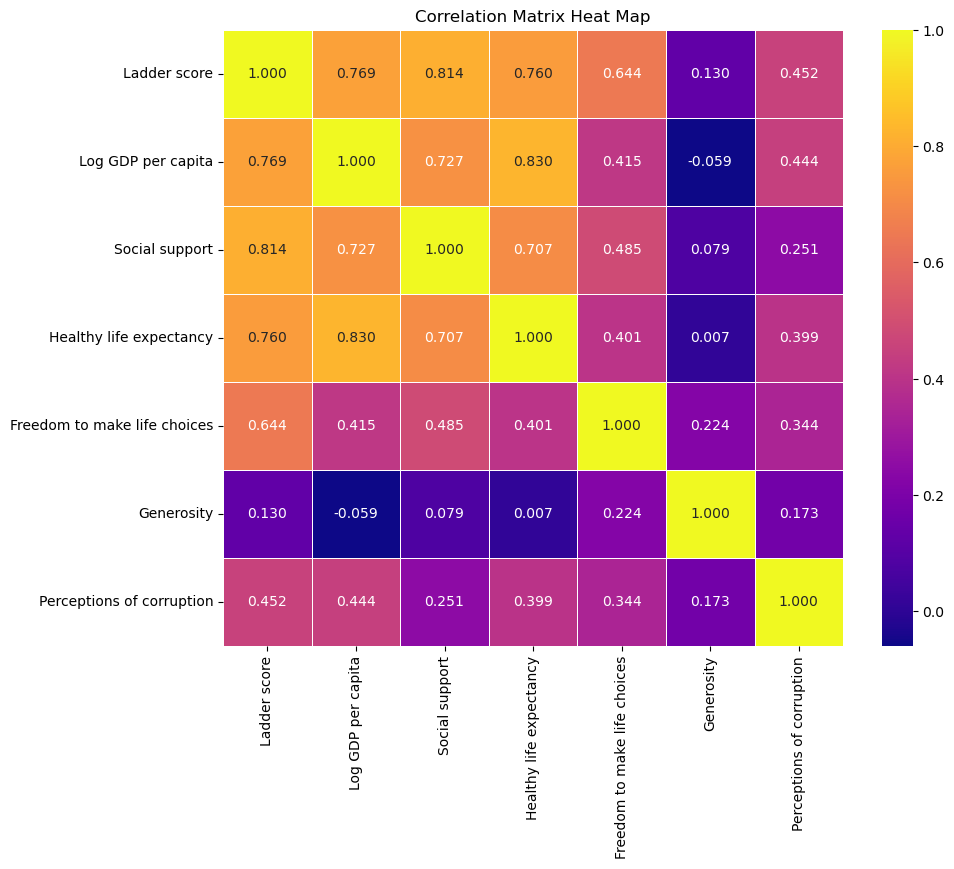

In [26]:
import matplotlib.pyplot as plt # Import missing module
import seaborn as sns # Also import Seaborn
import numpy as np # Let's add NumPy (can be used for mask)

# Define columns for Correlation Analysis
columns = ['Ladder score',
'Log GDP per capita',
'Social support',
'Healthy life expectancy',
'Freedom to make life choices',
'Generosity',
'Perceptions of corruption']

# Create the correlation matrix
correlation_matrix = data[columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="plasma", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix Heat Map")
plt.show()

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("2024.csv")

# Set column "Country name" as index
data.set_index("Country name", inplace=True)

# Select variables to use for clustering
X = data.iloc[:, 1:]  # Get all columns except the first column (Country name)

# Fill missing values with column averages
X.fillna(X.mean(), inplace=True)

# Create K-means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(X)

C:\Users\ÇELİK\AppData\Local\Temp\ipykernel_24372\408500193.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [28]:
# Get cluster labels
clusters = kmeans.labels_

# Add the extracted cluster labels to the DataFrame based on the number of clusters
data['Cluster'] = clusters

# Show cluster centers
print("Küme Merkezleri:")
print(kmeans.cluster_centers_)

# Show groups by cluster number
print("\nKüme Sayısı ve Üye Sayıları:")
print(data['Cluster'].value_counts())

Küme Merkezleri:
[[6.03702    5.81424    1.47205614 1.30392657 0.58529771 0.64717243
  0.13290543 0.10266243 1.67311829]
 [3.61278947 3.34226316 0.96778947 0.73221053 0.34926316 0.48242105
  0.12073684 0.12105263 0.704     ]
 [6.96308333 6.78822222 1.81502778 1.40741667 0.66316667 0.74141667
  0.16655556 0.28938889 1.79269444]
 [4.88218421 4.62123684 1.04835827 0.85351729 0.38715188 0.5403485
  0.15740902 0.11021692 1.67860075]]

Küme Sayısı ve Üye Sayıları:
Cluster
0    50
3    38
2    36
1    19
Name: count, dtype: int64


C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_

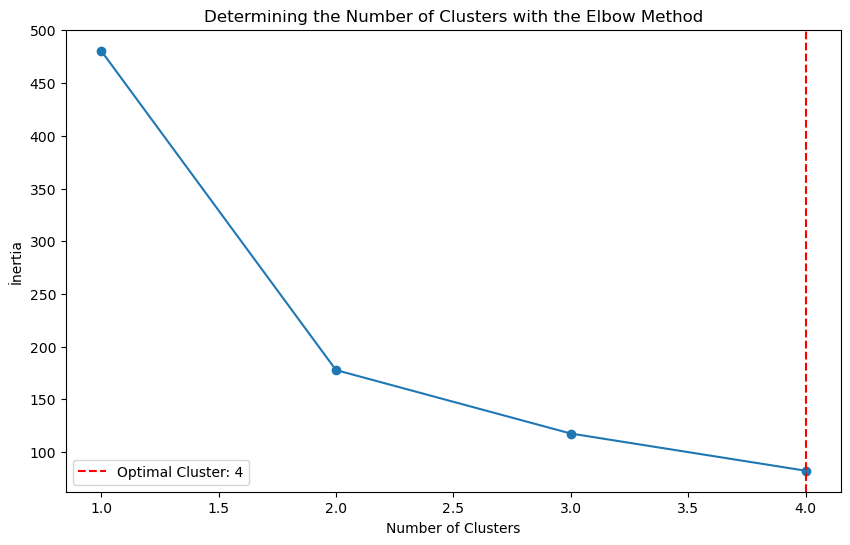

In [29]:
# Determining the most appropriate number of clusters with the Elbow method
sse = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graph for determining the most appropriate number of clusters according to the point where the elbow is formed
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), sse, marker='o')
plt.title('Determining the Number of Clusters with the Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('İnertia')

# Estimate and highlight the most suitable number of clusters
optimal_k = range(1, 5)[sse.index(min(sse, key=lambda x: abs(x - min(sse))))]
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal Cluster: {optimal_k}')
plt.legend()
plt.show()

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
[[6.03702    5.81424    1.47205614 1.30392657 0.58529771 0.64717243
  0.13290543 0.10266243 1.67311829]
 [3.61278947 3.34226316 0.96778947 0.73221053 0.34926316 0.48242105
  0.12073684 0.12105263 0.704     ]
 [6.96308333 6.78822222 1.81502778 1.40741667 0.66316667 0.74141667
  0.16655556 0.28938889 1.79269444]
 [4.88218421 4.62123684 1.04835827 0.85351729 0.38715188 0.5403485
  0.15740902 0.11021692 1.67860075]]

Number of Clusters and Number of Members:
Cluster
0    50
3    38
2    36
1    19
Name: count, dtype: int64


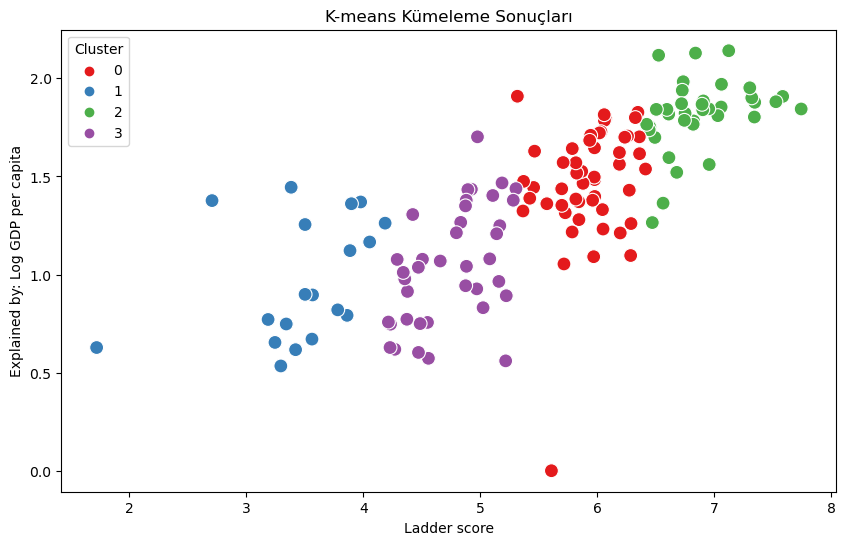

In [30]:
# Create K-means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels
clusters = kmeans.labels_

# Add the extracted cluster labels to the DataFrame based on the number of clusters
data['Cluster'] = clusters

# Show cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Show groups by cluster number
print("\nNumber of Clusters and Number of Members:")
print(data['Cluster'].value_counts())

# Visualize clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Ladder score', y='Explained by: Log GDP per capita', hue='Cluster', palette='Set1', s=100)
plt.title('K-means Kümeleme Sonuçları')
plt.xlabel('Ladder score')
plt.ylabel('Explained by: Log GDP per capita')
plt.legend(title='Cluster')
plt.show()

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


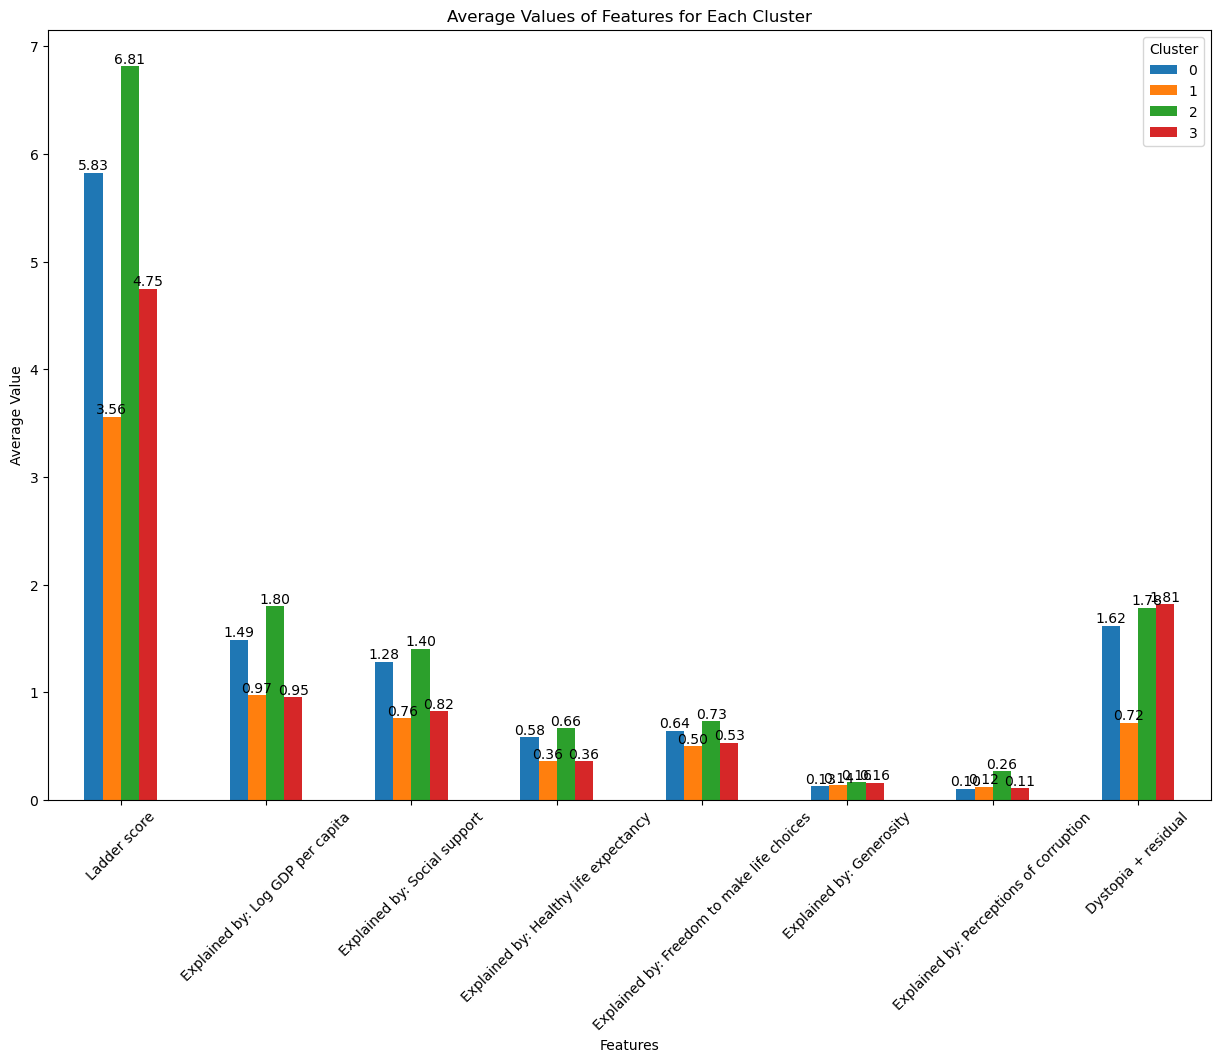

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('2024.csv')

# Set 'Country name' as the index
data.set_index("Country name", inplace=True)

# Remove the 'upperwhisker' and 'lowerwhisker' columns from the dataset
X = data.drop(['upperwhisker', 'lowerwhisker'], axis=1)

# Fill missing values with column means
X.fillna(X.mean(), inplace=True)

# Create and fit the KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Calculate the mean values for each feature in each cluster, excluding the removed columns
cluster_means = data.drop(['upperwhisker', 'lowerwhisker'], axis=1).groupby('Cluster').mean()

# Plot the average values of features in each cluster with a bar chart and label each bar with its value
fig, ax = plt.subplots(figsize=(15, 10))
bars = cluster_means.T.plot(kind='bar', ax=ax)

# Add labels on each bar
for container in bars.containers:
    bars.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# Set the title and labels
plt.title('Average Values of Features for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.legend(title='Cluster')

# Fix the rotation issue
plt.xticks(rotation=45)  # Rotate the X-axis labels by 45 degrees

plt.show()


In [15]:
cluster_means

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Cluster,,,,,,,,
0,5.825458,1.485826,1.280565,0.581043,0.641696,0.125457,0.104630,1.615261
1,3.560381,0.970333,0.758048,0.357810,0.499000,0.136429,0.121190,0.717571
2,6.812780,1.800585,1.404659,0.663220,0.730854,0.164341,0.264293,1.784805
3,4.749394,0.952625,0.824688,0.359063,0.528906,0.159500,0.105719,1.815000


C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_

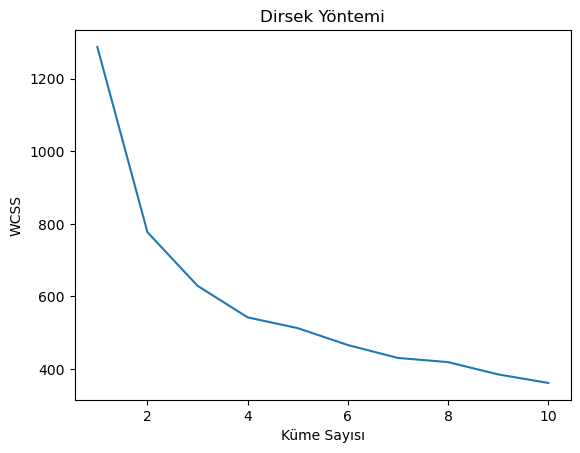

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


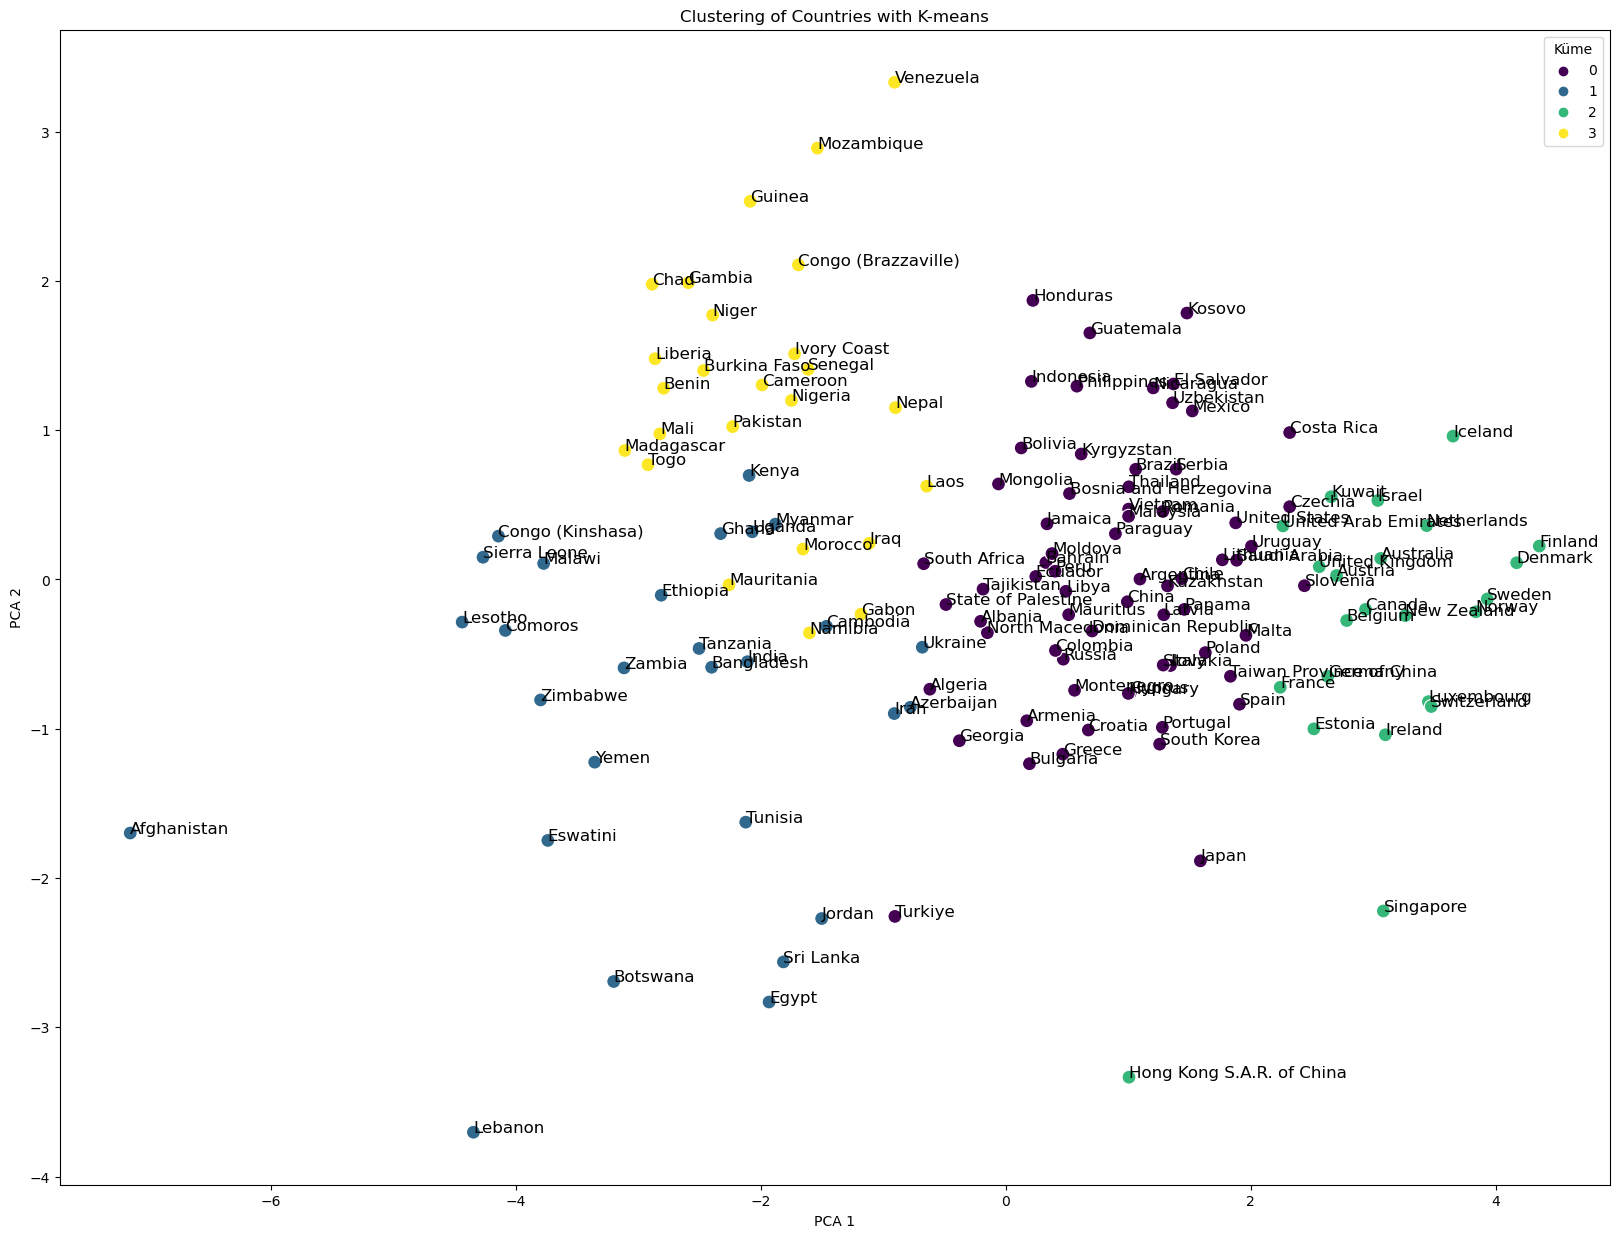

Küme 0:
 ['Costa Rica' 'Czechia' 'Lithuania' 'Slovenia' 'United States' 'Mexico'
 'Uruguay' 'Saudi Arabia' 'Kosovo' 'Taiwan Province of China' 'Romania'
 'El Salvador' 'Poland' 'Spain' 'Serbia' 'Chile' 'Panama' 'Malta' 'Italy'
 'Guatemala' 'Nicaragua' 'Brazil' 'Slovakia' 'Latvia' 'Uzbekistan'
 'Argentina' 'Kazakhstan' 'Cyprus' 'Japan' 'South Korea' 'Philippines'
 'Vietnam' 'Portugal' 'Hungary' 'Paraguay' 'Thailand' 'Malaysia' 'China'
 'Honduras' 'Bahrain' 'Croatia' 'Greece' 'Bosnia and Herzegovina' 'Libya'
 'Jamaica' 'Peru' 'Dominican Republic' 'Mauritius' 'Moldova' 'Russia'
 'Bolivia' 'Ecuador' 'Kyrgyzstan' 'Montenegro' 'Mongolia' 'Colombia'
 'Indonesia' 'Bulgaria' 'Armenia' 'South Africa' 'North Macedonia'
 'Algeria' 'Albania' 'Tajikistan' 'Georgia' 'Turkiye' 'State of Palestine']
Küme 1:
 ['Iran' 'Azerbaijan' 'Ukraine' 'Kenya' 'Tunisia' 'Uganda' 'Myanmar'
 'Cambodia' 'Ghana' 'Jordan' 'India' 'Egypt' 'Sri Lanka' 'Bangladesh'
 'Ethiopia' 'Tanzania' 'Comoros' 'Yemen' 'Zambia' 'Eswatini

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('2024.csv')

# Separate properties and target variables
X = df.drop(columns=['Country name', 'Ladder score'])
y = df['Ladder score']

# Fill missing values with average
X_imputed = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X), columns=X.columns)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Determine the appropriate number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Dirsek Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

# K-means clustering (e.g. with 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Reduction to two dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Data Visualization
plt.figure(figsize=(20, 15))
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Clustering of Countries with K-means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Add clusters to original dataframe
df['Cluster'] = clusters

# Label each data point
for i in range(len(X_pca)):
    plt.text(X_pca[i, 0], X_pca[i, 1], df['Country name'].iloc[i], fontsize=12)

plt.legend(title='Küme')
plt.show()

# Print the countries in each set
for cluster in range(kmeans.n_clusters):
    print(f"Küme {cluster}:\n", df[df['Cluster'] == cluster]['Country name'].values)

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('2024.csv')

# Preprocessing: Removing non-numeric columns and handling missing values
data_numeric = data.select_dtypes(include=['float64', 'int64'])
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Define number of clusters
n_clusters = 4

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Evaluate clustering performance
silhouette_avg = silhouette_score(data_scaled, clusters)
davies_bouldin = davies_bouldin_score(data_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(data_scaled, clusters)

# Print evaluation scores
print(f'Silhouette Score: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index: {davies_bouldin:.3f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz:.3f}')


Silhouette Score: 0.279
Davies-Bouldin Index: 1.330
Calinski-Harabasz Index: 71.026


C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Özellik Önem Analizi

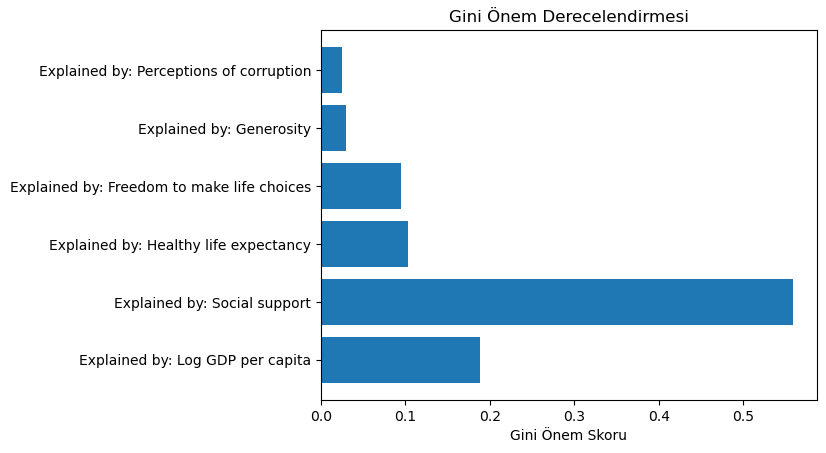

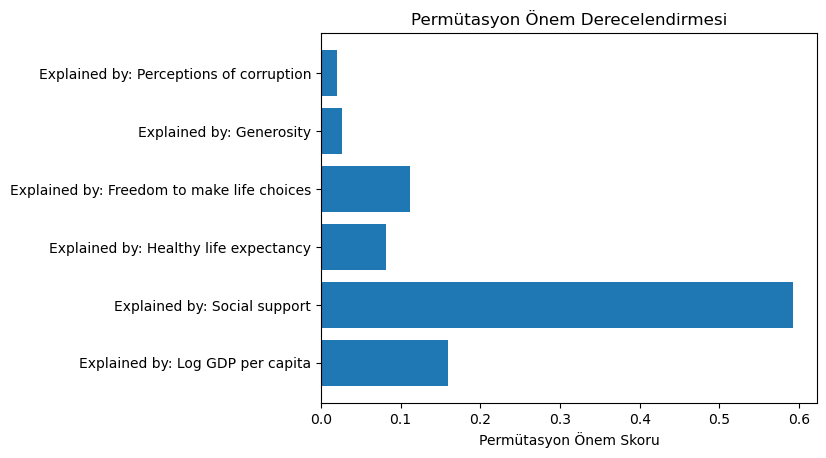

Gini Önem Skorları:
Explained by: Log GDP per capita: 0.18880105222332605
Explained by: Social support: 0.559176112517013
Explained by: Healthy life expectancy: 0.10343042735839686
Explained by: Freedom to make life choices: 0.0944262133024687
Explained by: Generosity: 0.029311422170628466
Explained by: Perceptions of corruption: 0.02485477242816702

Permütasyon Önem Skorları:
Explained by: Log GDP per capita: 0.1600255130639626
Explained by: Social support: 0.5928084436272257
Explained by: Healthy life expectancy: 0.08167151582229393
Explained by: Freedom to make life choices: 0.11213363000152647
Explained by: Generosity: 0.026952416341167483
Explained by: Perceptions of corruption: 0.020680002113561035


In [18]:
# Gerekli kütüphaneleri yükleyin
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Veri setinizi yükleyin
data = pd.read_csv('2024.csv')

# Bağımlı ve bağımsız değişkenleri belirleyin
X = data.drop(columns=['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker', 'Dystopia + residual'])
y = data['Ladder score']  # Mutluluk skoru bağımlı değişken olarak alınır

# Model kurulum ve eğitim
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Gini önemi (özelliklerin sıralanması)
feature_importances = model.feature_importances_
feature_names = X.columns

# Permütasyon önemi
perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)

# Sonuçları görselleştirme
# Gini önemi grafiği
plt.barh(feature_names, feature_importances)
plt.xlabel('Gini Önem Skoru')
plt.title('Gini Önem Derecelendirmesi')
plt.show()

# Permütasyon önemi
perm_scores = perm_importance.importances_mean
plt.barh(feature_names, perm_scores)
plt.xlabel('Permütasyon Önem Skoru')
plt.title('Permütasyon Önem Derecelendirmesi')
plt.show()

# Önemli özelliklerin skorlarını yazdırmak
print("Gini Önem Skorları:")
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance}")

print("\nPermütasyon Önem Skorları:")
for feature, importance in zip(feature_names, perm_scores):
    print(f"{feature}: {importance}")


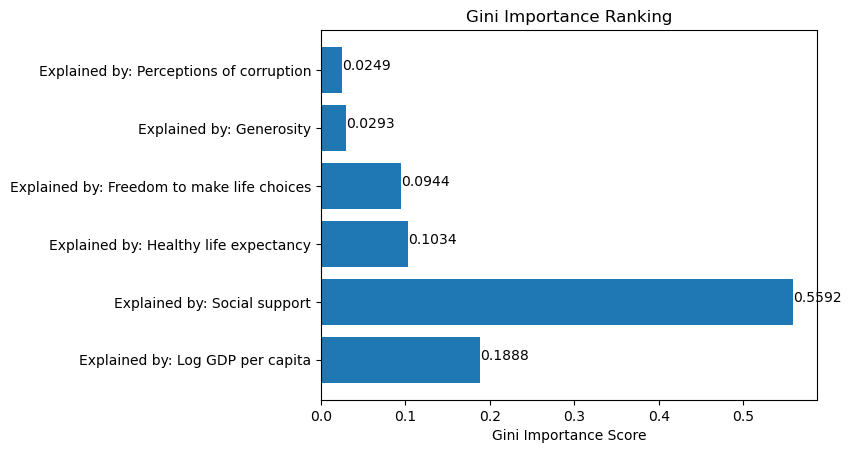

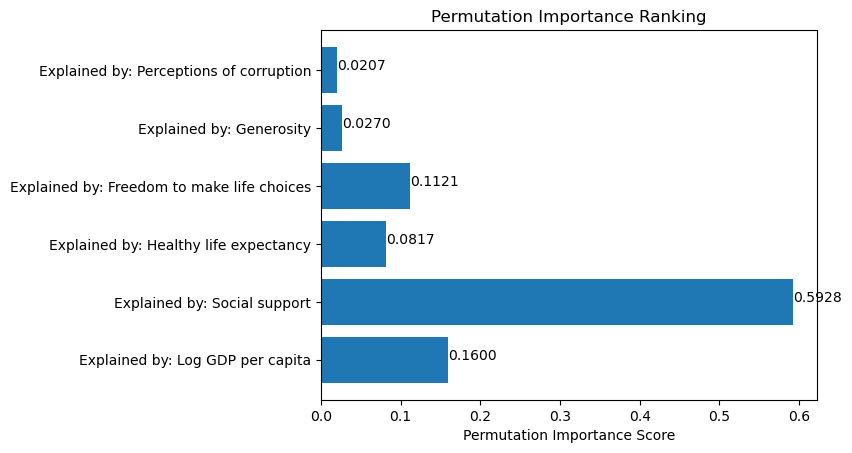

Gini Importance Scores:
Explained by: Log GDP per capita: 0.1888
Explained by: Social support: 0.5592
Explained by: Healthy life expectancy: 0.1034
Explained by: Freedom to make life choices: 0.0944
Explained by: Generosity: 0.0293
Explained by: Perceptions of corruption: 0.0249

Permutation Importance Scores:
Explained by: Log GDP per capita: 0.1600
Explained by: Social support: 0.5928
Explained by: Healthy life expectancy: 0.0817
Explained by: Freedom to make life choices: 0.1121
Explained by: Generosity: 0.0270
Explained by: Perceptions of corruption: 0.0207


In [19]:
# Gerekli kütüphaneleri yükleyin
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Veri setinizi yükleyin
data = pd.read_csv('2024.csv')

# Bağımlı ve bağımsız değişkenleri belirleyin
X = data.drop(columns=['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker', 'Dystopia + residual'])
y = data['Ladder score']  # Mutluluk skoru bağımlı değişken olarak alınır

# Model kurulum ve eğitim
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Gini önemi (özelliklerin sıralanması)
feature_importances = model.feature_importances_
feature_names = X.columns

# Permütasyon önemi
perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)

# Sonuçları görselleştirme
# Gini Önem Skoru Grafiği
plt.barh(feature_names, feature_importances)
plt.xlabel('Gini Importance Score')
plt.title('Gini Importance Ranking')

# Etiketleri ekleyin
for index, value in enumerate(feature_importances):
    plt.text(value, index, f'{value:.4f}')

plt.show()

# Permütasyon Önem Skoru Grafiği
perm_scores = perm_importance.importances_mean
plt.barh(feature_names, perm_scores)
plt.xlabel('Permutation Importance Score')
plt.title('Permutation Importance Ranking')

# Etiketleri ekleyin
for index, value in enumerate(perm_scores):
    plt.text(value, index, f'{value:.4f}')

plt.show()

# Önemli özelliklerin skorlarını yazdırmak
print("Gini Importance Scores:")
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")

print("\nPermutation Importance Scores:")
for feature, importance in zip(feature_names, perm_scores):
    print(f"{feature}: {importance:.4f}")


 Çalışmamızda mutluluğu etkileyen sosyo-ekonomik göstergelerin önemini belirlemek amacıyla Gini önemi ve permütasyon önemi analizleri gerçekleştirdik. Elde ettiğimiz sonuçlara göre, en önemli faktörlerin Social support (Gini: 0.5592, Permütasyon: 0.5928) olduğu ve ardından Log GDP per capita (Gini: 0.1888, Permütasyon: 0.1600) ile Healthy life expectancy (Gini: 0.1034, Permütasyon: 0.0817) geldiği belirlenmiştir. Diğer göstergeler, Freedom to make life choices, Generosity, ve Perceptions of corruption ise daha düşük öneme sahip faktörler olarak çıkmıştır. Bu analiz, mutluluğu etkileyen temel sosyo-ekonomik faktörleri net bir şekilde ortaya koymuş ve çalışmamıza değerli bir katkı sağlamıştır. Bu analiz, mutluluğu en çok etkileyen faktörlerin sosyal destek ve ekonomik refah olduğunu, ancak sağlıklı yaşam beklentisi gibi sağlıkla ilgili göstergelerin de önemli bir rol oynadığını ortaya koymaktadır.

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


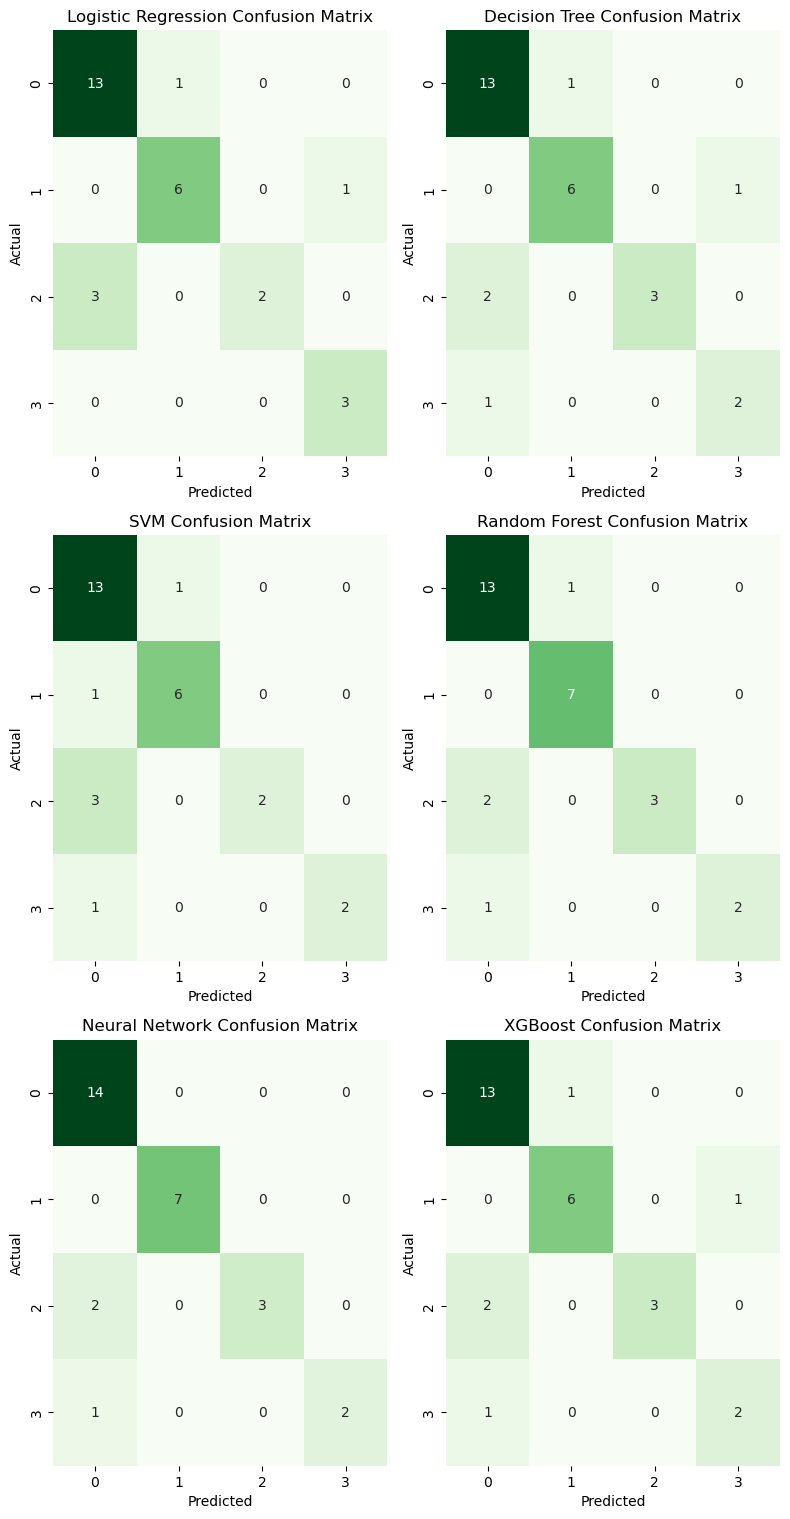

Logistic Regression Accuracy: 0.8275862068965517
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.86      0.86      0.86         7
           2       1.00      0.40      0.57         5
           3       0.75      1.00      0.86         3

    accuracy                           0.83        29
   macro avg       0.85      0.80      0.79        29
weighted avg       0.85      0.83      0.81        29

Decision Tree Accuracy: 0.8275862068965517
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.86      0.86      0.86         7
           2       1.00      0.60      0.75         5
           3       0.67      0.67      0.67         3

    accuracy                           0.83        29
   macro avg       0.83      0.76      0.79        29
weighted av

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('2024.csv')

# Separate properties and target variables
X = df.drop(columns=['Country name', 'Ladder score'])
y = df['Ladder score']

# Fill missing values ​​with average
X_imputed = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X), columns=X.columns)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# K-means clustering to use clusters as target variables
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_clusters = kmeans.fit_predict(X_scaled)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clusters, test_size=0.2, random_state=42)

# Define models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
neural_network_model = MLPClassifier(max_iter=1000, random_state=42)
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
neural_network_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_neural_network = neural_network_model.predict(X_test)
y_pred_xgboost = xgboost_model.predict(X_test)

# Draw Confusion Matrix for each model
models = {
    "Logistic Regression": y_pred_logistic,
    "Decision Tree": y_pred_decision_tree,
    "SVM": y_pred_svm,
    "Random Forest": y_pred_random_forest,
    "Neural Network": y_pred_neural_network,
    "XGBoost": y_pred_xgboost
}

# Plot Confusion Matrices in a single column
plt.figure(figsize=(8, 30))
for i, (model_name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(len(models), 2, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Print the accuracy of each model on the screen
for model_name, y_pred in models.items():
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

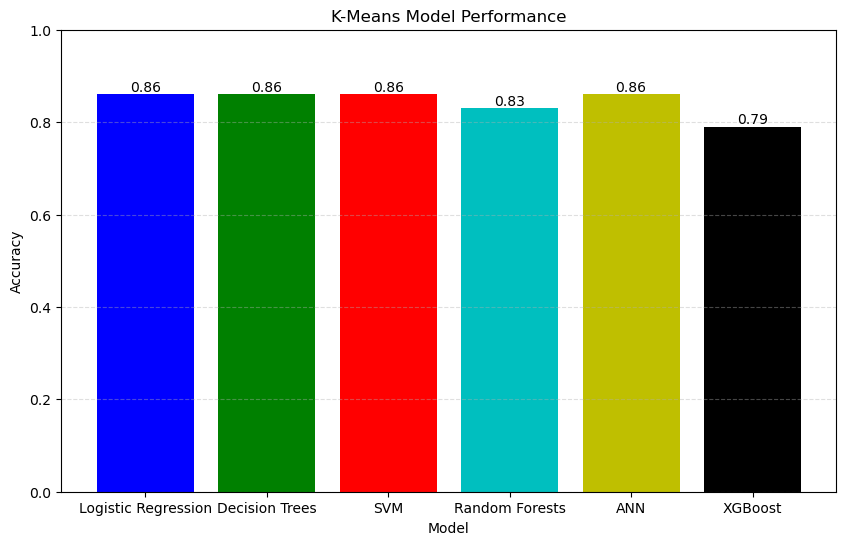

In [21]:
import matplotlib.pyplot as plt

# Model names and accuracy values
models = ["Logistic Regression", "Decision Trees", "SVM", "Random Forests", "ANN", "XGBoost"]
accuracies = [0.86, 0.86, 0.86, 0.83, 0.86, 0.79]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=["b", "g", "r", "c", "y", "k"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("K-Means Model Performance")
plt.ylim(0, 1)  # Y-axis limits
plt.grid(axis="y", linestyle="--", alpha=0.4)

# # Label numeric values
for i, acc in enumerate(accuracies):
    plt.text(i, acc, str(acc), ha='center', va='bottom')

plt.show()